# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
billboard = pd.read_csv("../assets/billboard.csv") #reading data set in
#print billboard.tail()
print billboard.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        316 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.wek          210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

##### Create a data dictionary for the data set.

In [3]:
data_dict = {'year': 'Year the song was released 317',
'artist.inverted':'' ,  
'track':'track name 317',           
'time':'song length 317',            
'genre':'genre name 317',            
'date.entered':'date entered into billboard 317',    
'date.peaked':'date with the highest billboard score 316',    
'x1st.week-x76th':'score since week released 317'}
print data_dict

{'genre': 'genre name 317', 'date.peaked': 'date with the highest billboard score 316', 'x1st.week-x76th': 'score since week released 317', 'year': 'Year the song was released 317', 'track': 'track name 317', 'time': 'song length 317', 'artist.inverted': '', 'date.entered': 'date entered into billboard 317'}


##### Write a brief description of your data, and any interesting observations you've made thus far. 

Analyzing the latest generation's guilty pleasure- the music of the '00s. Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent quandary in the industry- why do we like what we like?

['year' 'artist.inverted' 'track' 'time' 'genre' 'date.entered'
 'date.peaked' 'x1st.week' 'x2nd.week']

interesting findings: Theres lots of different genres and even the Thong song from the famous rapper sisqo. Looks like the weeks refer to how many weeks the particular song has been on the billboard and what is the ranking.

## Step 2: Clean your data.

##### Clean names: Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [4]:
billboard = pd.read_csv('../assets/billboard.csv')
import string 
print(string.ascii_lowercase) #print alphabet
billboard.columns = [
    ''.join([
            y for y in x.lower() 
            if y in string.ascii_lowercase+' '+'0123456789'+'.'    # filter only allow if y in alphabet or ' ' or integers or ., replace it
        ]).replace(' ','_').replace('.','_')
    for x in billboard.columns
]
billboard

        
billboard = billboard.rename(columns = {'artist_inverted':'artist'})    #rename column as artist
billboard.head()


abcdefghijklmnopqrstuvwxyz


,year,artist,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x67th_week,x68th_week,x69th_week,x70th_week,x71st_week,x72nd_week,x73rd_week,x74th_week,x75th_week,x76th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### convert 1st_week to float

In [5]:
billboard.loc['x1st_week':] = billboard.loc['x1st_week':].astype(float)
#billboard.loc['time'] = billboard['time'].astype(%time)
billboard.dtypes

year            float64
artist           object
track            object
time             object
genre            object
date_entered     object
date_peaked      object
x1st_week       float64
x2nd_week       float64
x3rd_week       float64
x4th_week       float64
x5th_week       float64
x6th_week       float64
x7th_week       float64
x8th_week       float64
x9th_week       float64
x10th_week      float64
x11th_week      float64
x12th_week      float64
x13th_wek       float64
x14th_week      float64
x15th_week      float64
x16th_week      float64
x17th_week      float64
x18th_week      float64
x19th_week      float64
x20th_week      float64
x21st_week      float64
x22nd_week      float64
x23rd_week      float64
                 ...   
x47th_week      float64
x48th_week      float64
x49th_week      float64
x50th_week      float64
x51st_week      float64
x52nd_week      float64
x53rd_week      float64
x54th_week      float64
x55th_week      float64
x56th_week      float64
x57th_week      

In [6]:
billboard.columns = map(lambda x: x.replace('x', ''), billboard)

billboard.columns = ['year', 'artist', 'track', 'time', 'genre', 'date_entered',
       'date_peaked', '1st_week', '2nd_week', '3rd_week', '4th_week',
       '5th_week', '6th_week', '7th_week', '8th_week', '9th_week',
       '10th_week', '11th_week', '12th_week', '13th_week', '14th_week',
       '15th_week', '16th_week', '17th_week', '18th_week', '19th_week',
       '20th_week', '21st_week', '22nd_week', '23rd_week', '24th_week',
       '25th_week', '26th_week', '27th_week', '28th_week', '29th_week',
       '30th_week', '31st_week', '32nd_week', '33rd_week', '34th_week',
       '35th_week', '36th_week', '37th_week', '38th_week', '39th_week',
       '40th_week', '41st_week', '42nd_week', '43rd_week', '44th_week',
       '45th_week', '46th_week', '47th_week', '48th_week', '49th_week',
       '50th_week', '51st_week', '52nd_week', '53rd_week', '54th_week',
       '55th_week', '56th_week', '57th_week', '58th_week', '59th_week',
       '60th_week', '61st_week', '62nd_week', '63rd_week', '64th_week',
       '65th_week', '66th_week', '67th_week', '68th_week', '69th_week',
       '70th_week', '71st_week', '72nd_week', '73rd_week', '74th_week',
       '75th_week', '76th_week']




##manually edited names 


### Slice data to 65th week

In [7]:
clean_billboard = billboard.loc[:,:'65th_week']   # slice the data to the 65th week, since all the values after are NaN



### Manipulate dates to date and time -> seconds

In [8]:
#billboard['time'].apply()

times = map(lambda x: x.replace(':',''),clean_billboard['time'])
new_times = []
for string1 in times:
    total_sec = (int(string1[0]) * 60) + (int(string1[1])*10) + int(string1[2])
    new_times.append(float(total_sec))
    
clean_billboard['time'] = pd.Series(new_times)
clean_billboard[0:5]
       


,year,artist,track,time,genre,date_entered,date_peaked,1st_week,2nd_week,3rd_week,...,56th_week,57th_week,58th_week,59th_week,60th_week,61st_week,62nd_week,63rd_week,64th_week,65th_week
0,2000.0,Destiny's Child,Independent Women Part I,218.0,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000.0,Santana,"Maria, Maria",258.0,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000.0,Savage Garden,I Knew I Loved You,247.0,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000.0,Madonna,Music,225.0,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000.0,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218.0,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### create days_to_peak

In [9]:
# days to peak
clean_billboard['date_entered'] = pd.to_datetime(clean_billboard['date_entered'])
clean_billboard['date_peaked'] = pd.to_datetime(clean_billboard['date_peaked'])
clean_billboard.insert(7,  'days_to_peak', (clean_billboard['date_peaked'] - clean_billboard['date_entered']).values)

clean_billboard['days_to_peak'][0:10]
clean_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 73 columns):
year            317 non-null float64
artist          317 non-null object
track           317 non-null object
time            317 non-null float64
genre           317 non-null object
date_entered    317 non-null datetime64[ns]
date_peaked     316 non-null datetime64[ns]
days_to_peak    316 non-null timedelta64[ns]
1st_week        317 non-null float64
2nd_week        312 non-null float64
3rd_week        307 non-null float64
4th_week        300 non-null float64
5th_week        292 non-null float64
6th_week        280 non-null float64
7th_week        269 non-null float64
8th_week        260 non-null float64
9th_week        253 non-null float64
10th_week       244 non-null float64
11th_week       236 non-null float64
12th_week       222 non-null float64
13th_week       210 non-null float64
14th_week       204 non-null float64
15th_week       197 non-null float64
16th_week       182 non-n

In [10]:
clean_billboard['days_to_peak'][0:10]

0    56 days
1    56 days
2    98 days
3    35 days
4    70 days
5    70 days
6    84 days
7    84 days
8    49 days
9   273 days
Name: days_to_peak, dtype: timedelta64[ns]

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

### MELT DATA

In [11]:
#clean_billboard.info()
clean_billboard[['track','artist','genre','days_to_peak']]

weeks = clean_billboard.iloc[:,8:].columns.values.tolist()
print weeks

billboard_long = pd.melt(clean_billboard, 
                         id_vars = ['year', 'artist', 'track', 'time' ,'genre','date_entered','date_peaked','days_to_peak'],
                         value_vars = None, 
                         var_name = 'week', 
                         value_name = 'ranking')
billboard_long






['1st_week', '2nd_week', '3rd_week', '4th_week', '5th_week', '6th_week', '7th_week', '8th_week', '9th_week', '10th_week', '11th_week', '12th_week', '13th_week', '14th_week', '15th_week', '16th_week', '17th_week', '18th_week', '19th_week', '20th_week', '21st_week', '22nd_week', '23rd_week', '24th_week', '25th_week', '26th_week', '27th_week', '28th_week', '29th_week', '30th_week', '31st_week', '32nd_week', '33rd_week', '34th_week', '35th_week', '36th_week', '37th_week', '38th_week', '39th_week', '40th_week', '41st_week', '42nd_week', '43rd_week', '44th_week', '45th_week', '46th_week', '47th_week', '48th_week', '49th_week', '50th_week', '51st_week', '52nd_week', '53rd_week', '54th_week', '55th_week', '56th_week', '57th_week', '58th_week', '59th_week', '60th_week', '61st_week', '62nd_week', '63rd_week', '64th_week', '65th_week']


,year,artist,track,time,genre,date_entered,date_peaked,days_to_peak,week,ranking
0,2000.0,Destiny's Child,Independent Women Part I,218.0,Rock,2000-09-23,2000-11-18,56 days,1st_week,78.0
1,2000.0,Santana,"Maria, Maria",258.0,Rock,2000-02-12,2000-04-08,56 days,1st_week,15.0
2,2000.0,Savage Garden,I Knew I Loved You,247.0,Rock,1999-10-23,2000-01-29,98 days,1st_week,71.0
3,2000.0,Madonna,Music,225.0,Rock,2000-08-12,2000-09-16,35 days,1st_week,41.0
4,2000.0,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218.0,Rock,2000-08-05,2000-10-14,70 days,1st_week,57.0
5,2000.0,Janet,Doesn't Really Matter,257.0,Rock,2000-06-17,2000-08-26,70 days,1st_week,59.0
6,2000.0,Destiny's Child,Say My Name,271.0,Rock,1999-12-25,2000-03-18,84 days,1st_week,83.0
7,2000.0,"Iglesias, Enrique",Be With You,216.0,Latin,2000-04-01,2000-06-24,84 days,1st_week,63.0
8,2000.0,Sisqo,Incomplete,232.0,Rock,2000-06-24,2000-08-12,49 days,1st_week,77.0
9,2000.0,Lonestar,Amazed,265.0,Country,1999-06-05,2000-03-04,273 days,1st_week,81.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [12]:
#mask = np.isnan, is it fair to remove all these values
print np.isnan(billboard_long['ranking'].unique())
               
mask = np.isnan(billboard_long['ranking'])
final_billboard = billboard_long[~mask]    # all number values
billboard_nan = billboard_long[mask]
print billboard_nan.ranking

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False]
588     NaN
618     NaN
628     NaN
629     NaN
633     NaN
848     NaN
905     NaN
935     NaN
943     NaN
944     NaN
945     NaN
946     NaN
948     NaN
949     NaN
950     NaN
1165    NaN
1206    NaN
1211    NaN
1222    NaN
1238    NaN
1242    NaN
1251    NaN
1257    NaN
1258    NaN
1259    NaN
1260    NaN
1261    NaN
1262    NaN
1263    NaN
1265    NaN
         ..
20575   NaN


## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Having explored the data types and issues, the goal of this project is to perform some preliminary exploratory analysis and make some nice grpahs. Some topics that I found of interest include looking at the distribution of genres among the billboard and which genres are most successful. Also I would like to know what were the top artists of the 2000s and how many weeks they stayed in the top 10 of the billboard.

In [27]:
sns.set(rc={"figure.figsize": (12, 12)})
#sns.set(font_scale=2)

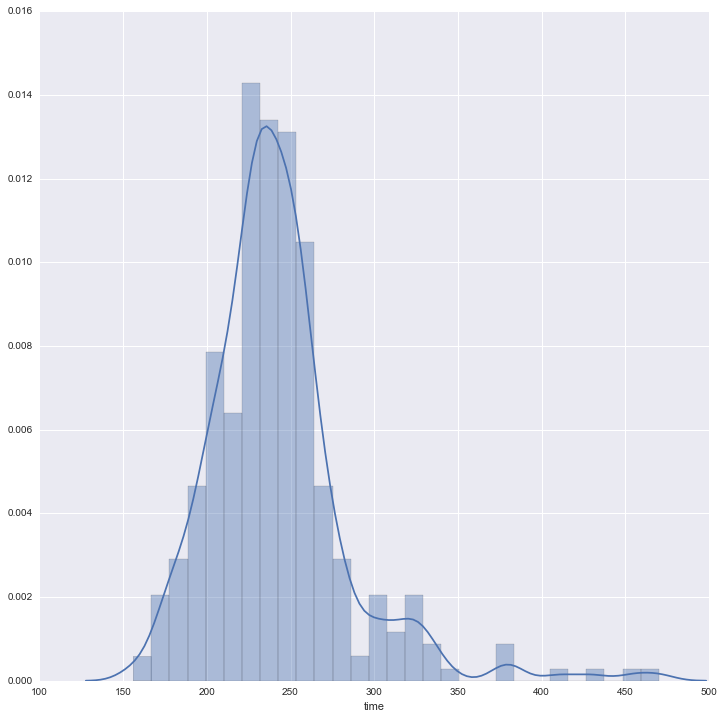

In [28]:
sns.distplot(clean_billboard.time)

genre counts:
Rock           8905
Country        4810
Rap            3770
R&B            1430
Pop             585
Latin           585
Electronica     260
Jazz             65
Gospel           65
R&B\n            65
Reggae           65
Name: genre, dtype: int64
Rock           2587
Country        1200
Rap             837
R&B             244
Latin           173
Pop             137
Electronica      72
Gospel           20
R&B\n            17
Reggae           15
Jazz              5
Name: genre, dtype: int64


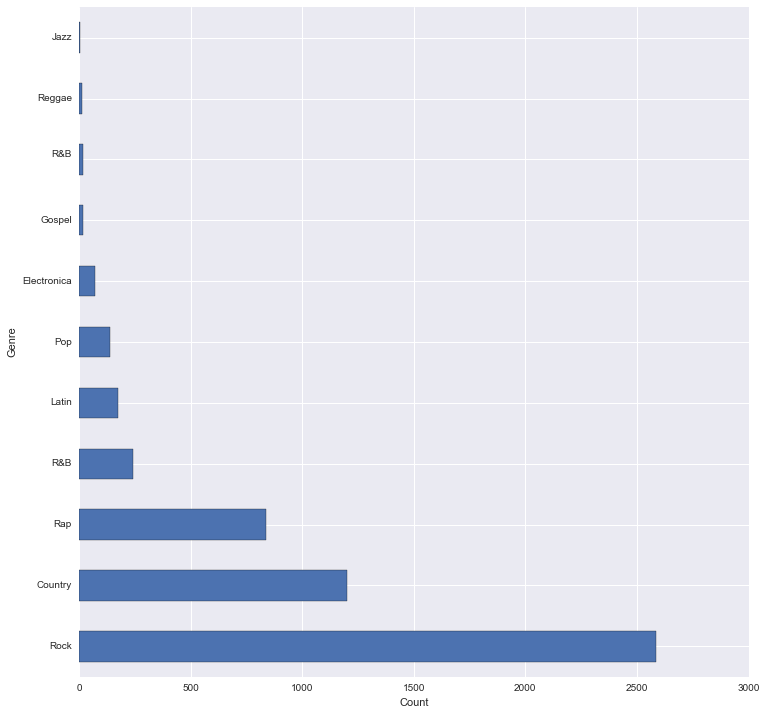

In [15]:
# Genre count distribution
print 'genre counts:' 
print billboard_long.genre.value_counts()    #pre NaN removed value counts for genre
print final_billboard.genre.value_counts()   #post NaN removed

#axes.set_title('Average performance of total songs on billboard')
g = final_billboard.genre.value_counts().plot(kind="barh")
g.set_xlabel('Count')
g.set_ylabel('Genre')


genre means:
genre
Country        61.687500
Electronica    62.847222
Gospel         67.750000
Jazz           51.800000
Latin          47.653179
Pop            54.963504
R&B            69.040984
R&B\n          47.411765
Rap            56.236559
Reggae         72.400000
Rock           42.206803
Name: ranking, dtype: float64
min genre    artist                
Country  Adkins, Trace     2446    65.0
                           2129    68.0
                           1812    69.0
                           1178    73.0
                           1495    73.0
         Allan, Gary       902     76.0
                           1219    77.0
                           585     78.0
                           268     80.0
                           1536    92.0
         Black, Clint      2699    44.0
                           3016    44.0
                           3333    44.0
                           2382    47.0
                           2065    51.0
         Brock, Chad       3890    22.0

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: order is deprecated, use sort_values(...)


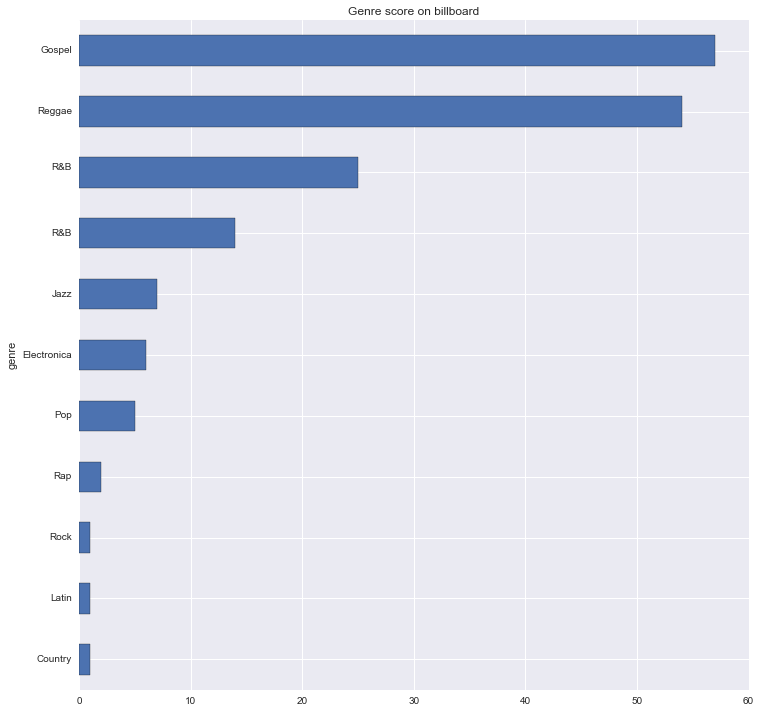

In [16]:
# GROUP BY GENRE min ranking



print '\n','genre means:'

print (final_billboard.groupby(['genre']).ranking.mean())

#print (final_billboard['ranking'].groupby([billboard_long.genre]).mean())



#final_billboard.groupby(['genre','artist']).ranking.nsmallest(5))


print 'min', (final_billboard.groupby(['genre','artist']).ranking.nsmallest(5))

print final_billboard[['ranking','artist']].groupby([billboard_long.genre]).min()

print 'max', (final_billboard[['ranking','artist']].groupby([billboard_long.genre]).max())



final_billboard.groupby(['genre']).ranking.min().order().plot(kind="barh", title = "Genre score on billboard")


                                              





In [17]:
#final_billboard[['ranking','artist']].groupby([billboard_long.genre]).nsmallest(5)

                      year  track  time  genre  date_entered  date_peaked  \
artist                                                                      
3 Doors Down            18     18    18     18            18           18   
98�                      5      5     5      5             5            5   
Aaliyah                 14     14    14     14            14           14   
Aguilera, Christina     18     18    18     18            18           18   
Anthony, Marc            6      6     6      6             6            6   
Backstreet Boys, The     8      8     8      8             8            8   
Badu, Erkyah             4      4     4      4             4            4   
Blaque                   8      8     8      8             8            8   
Blink-182                5      5     5      5             5            5   
Braxton, Toni            6      6     6      6             6            6   

                      days_to_peak  week  ranking  
artist                 

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


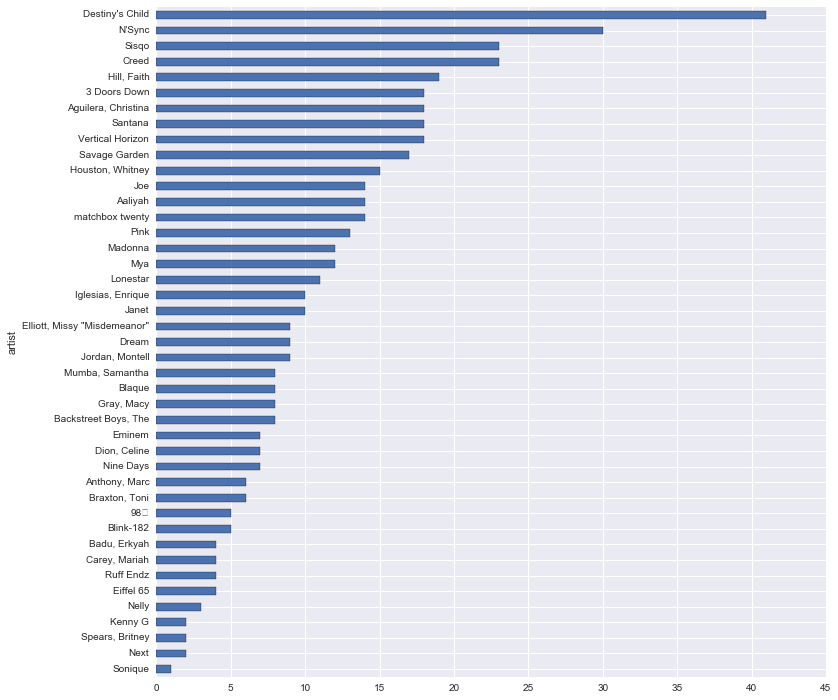

In [18]:
# How many weaks the artists consistently had a song that was in the top 10
top_artists = final_billboard[final_billboard['ranking'] < 10].groupby(['artist']).count()
print top_artists[0:10]
top_artists.ranking.order().plot(kind='barh')


In [19]:
#top_artists.order[0:5]

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


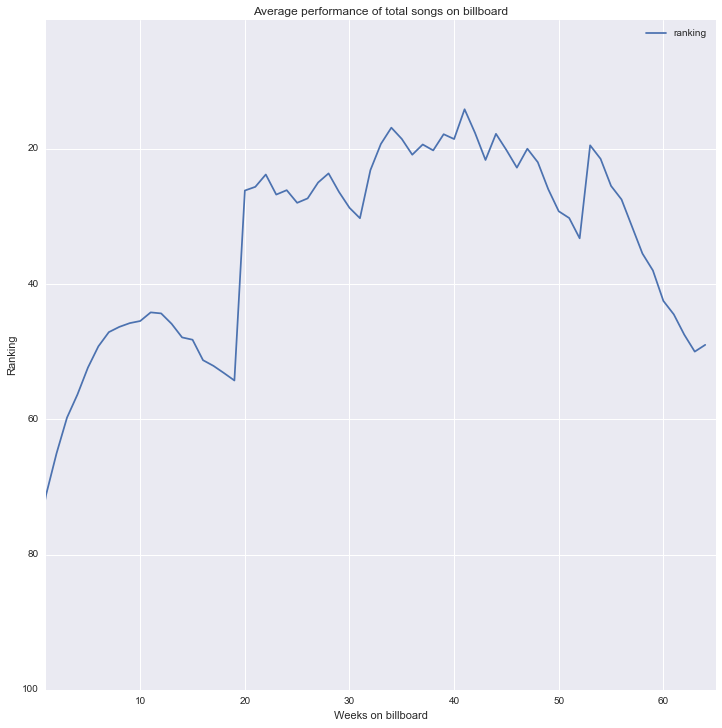

In [20]:
# group by week, give me ranking for that week
#graph tells us mean ranking of every song based on the week, from this you can infer when a song would most likely peak, x axis is weeks

# all these major drops are most likely songs falling out of the billboard
final_billboard['week'] = pd.Categorical(final_billboard.week, final_billboard.week.unique())
final_billboard.groupby('week').ranking.mean().reset_index().sort_values('week').plot()
axes=plt.gca()
axes.set_ylim([100,1])
axes.set_xlim([1,65])
axes.set_xlabel('Weeks on billboard')
axes.set_ylabel('Ranking')
axes.set_title('Average performance of total songs on billboard')

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


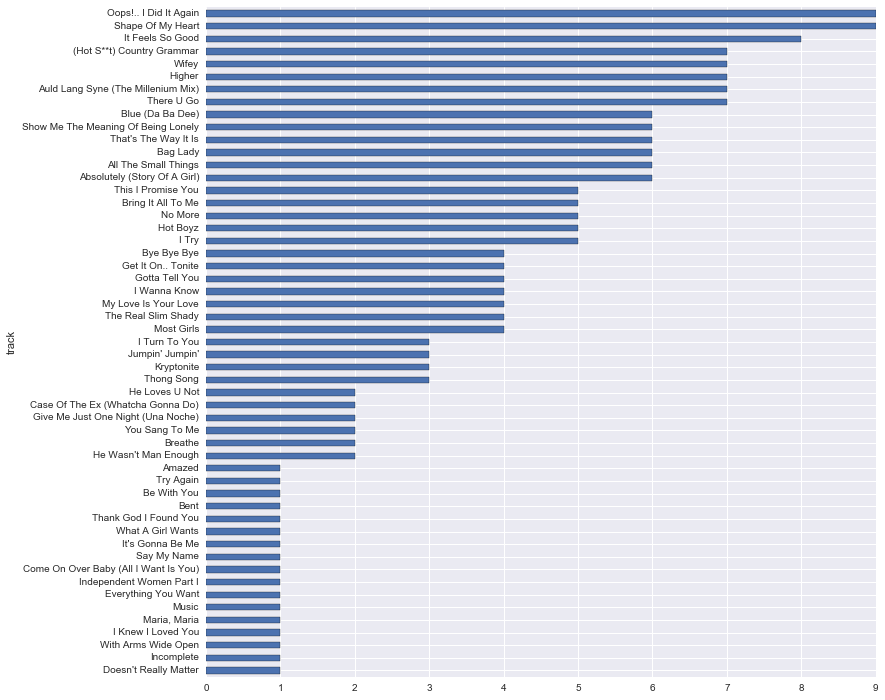

In [21]:
##### Most popular songs of 2000

top_track = final_billboard[final_billboard['ranking'] < 10].groupby(['track']).min()
#print top_track.sort_values('ranking')[0:100]
top_track.ranking.order().plot(kind='barh')


/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

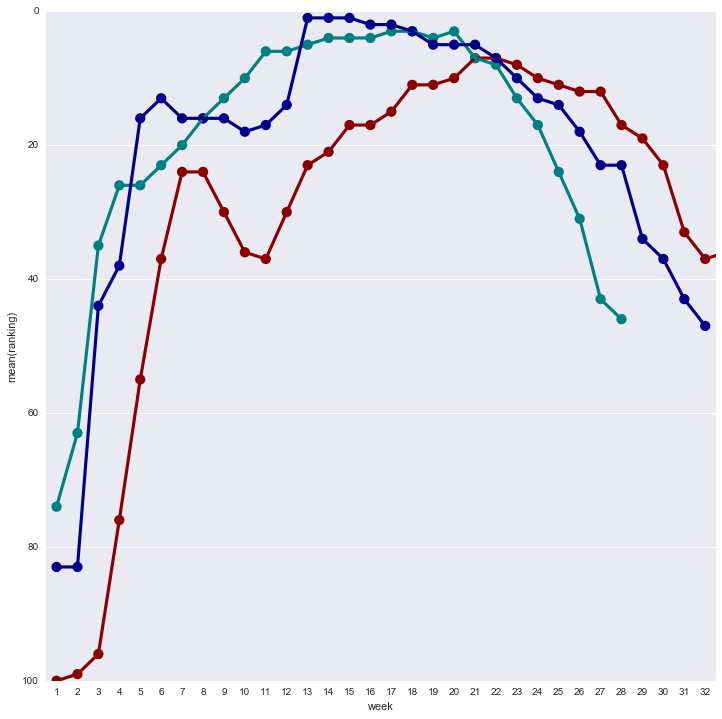

In [31]:
destiny = final_billboard[final_billboard['track'] == "Say My Name"]
destiny['week'] = np.arange(1,33)

#axes.set_title('Average performance of total songs on billboard')

nelly = final_billboard[final_billboard['track'] == "(Hot S**t) Country Grammar"]

nelly['week'] = np.arange(1,35)



#axes.set_title('Average performance of total songs on billboard')

thong = final_billboard[final_billboard['track'] == "Thong Song"]

thong['week'] = np.arange(1,29)
sns.set(rc={"figure.figsize": (12, 12)})


#axes.set_title('Average performance of total songs on billboard')

axes=plt.gca()
axes.set_ylim([100,0])
axes.set_xlim([1,35])
axes.set_xlabel('Weeks on billboard')
axes.set_ylabel('Ranking')

sns.pointplot(nelly.week, nelly.ranking, color = 'darkred')

sns.pointplot(thong.week, thong.ranking, color = 'teal')
sns.pointplot(destiny.week, destiny.ranking, color = 'darkblue')


# final_billboard.groupby('track').get_group('Say My Name').ranking.plot()
# print final_billboard.groupby(['track']).get_group('Say My Name').ranking

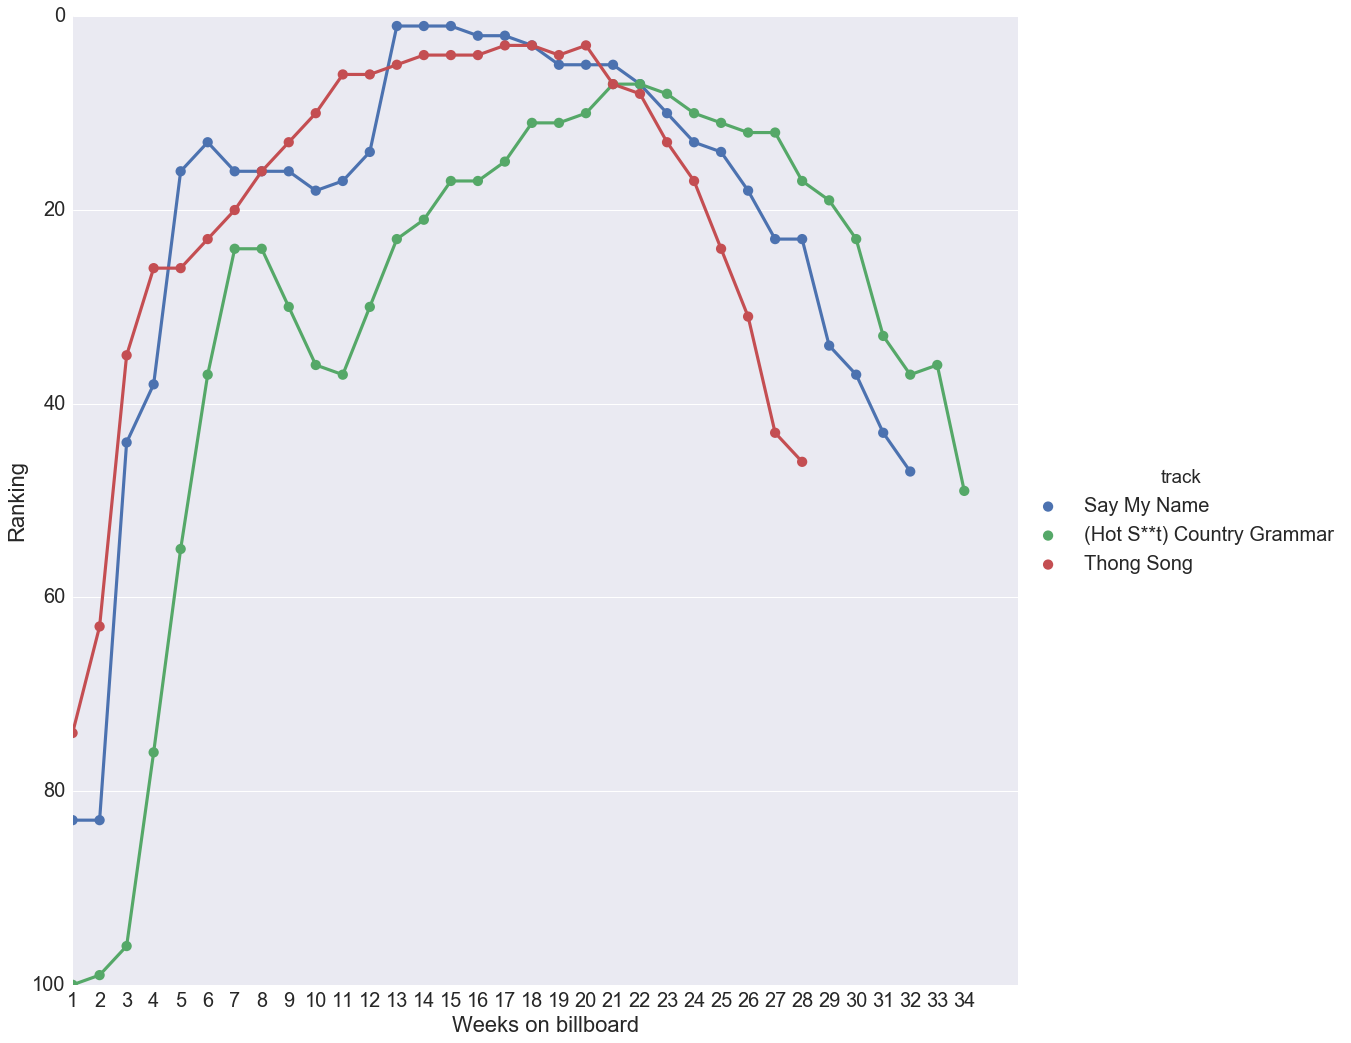

In [35]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.set(font_scale=2)
agg_thong = destiny.append(nelly).append(thong)

sns.factorplot(x='week', y= 'ranking', hue = "track", data = agg_thong, legend_out = True, size = 15)
axes=plt.gca()
axes.set_ylim([100,0])
axes.set_xlim([0,35])
axes.set_xlabel('Weeks on billboard')
axes.set_ylabel('Ranking')


In [42]:
from scipy.stats import ttest_ind
print 'nelly vs sisqo:',ttest_ind(nelly.ranking,thong.ranking)
print 'destiny vs nelly:',ttest_ind(destiny.ranking,nelly.ranking)
print 'sisqo vs destiny:',ttest_ind(thong.ranking,destiny.ranking)

nelly vs sisqo: Ttest_indResult(statistic=1.9878640139812951, pvalue=0.051395598057287613)
destiny vs nelly: Ttest_indResult(statistic=-1.7063808767469062, pvalue=0.092785684229338819)
sisqo vs destiny: Ttest_indResult(statistic=-0.32758629084483121, pvalue=0.74440401519725863)


## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

In [24]:
#https://medium.com/@stav.grossfeld/651bfc82058

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 